In [16]:
# Libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Classification Exploration/Modeling
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#Custom Imports
from acquire import get_mush_data
from acquire import split_mush_data
from acquire import prepare_mush
from charts import hab_chart
from charts import pop_chart
from charts import odor_chart
from charts import cap_chart


import warnings
warnings.filterwarnings('ignore')

ImportError: cannot import name 'odor_chart' from 'charts' (/Users/cheese_enchilada/codeup-data-science/mushroom-classification-project/charts.py)

# Acquire

In [2]:
df = get_mush_data()
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Prepare

In [3]:
features = df.columns
print(features)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [4]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Takeaways:
 - need to rename class, it won't work when coding.
 - need to rename anything with -
 - LOTS of columns, need to test to see which ones are focusing.

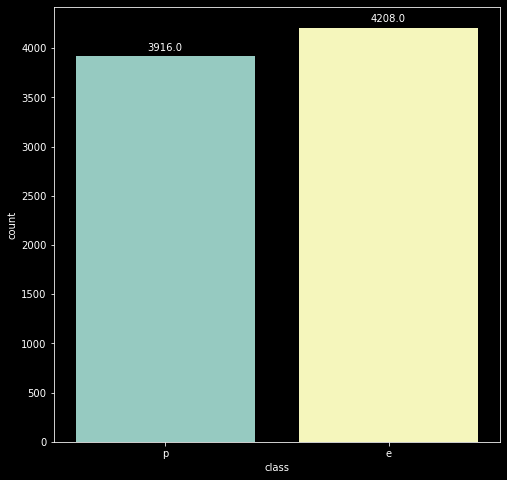

In [6]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize']=8,8 
s = sns.countplot(x = "class", data = df)
for p in s.patches:
    s.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.show()

There are more edible than poisonous

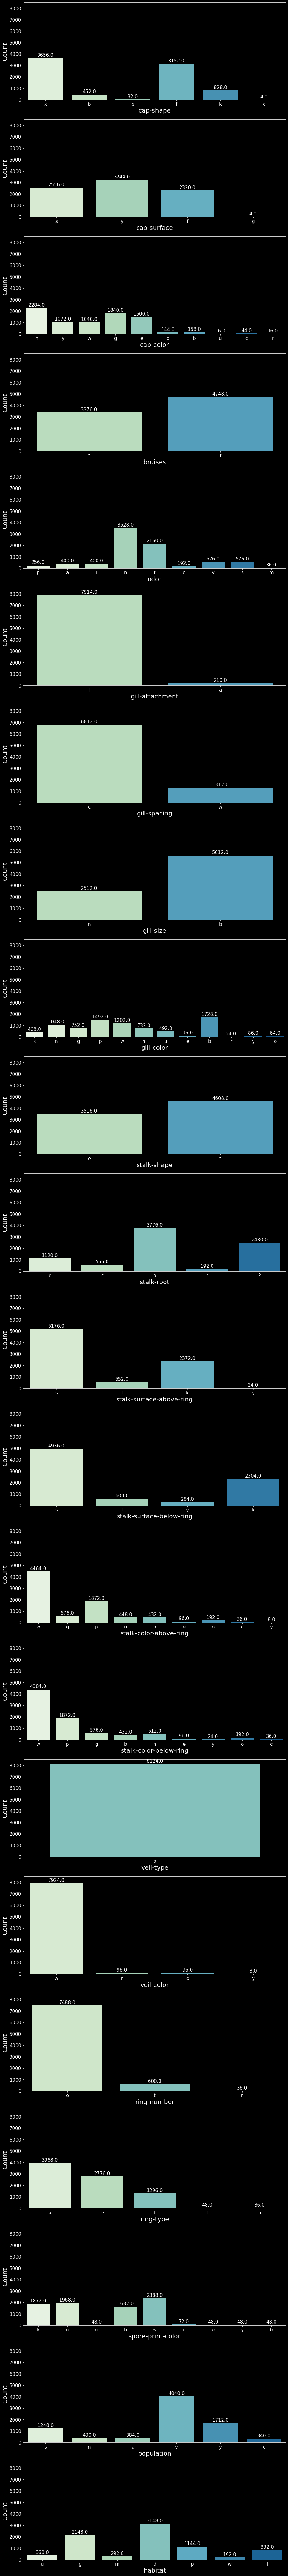

In [7]:
f, axes = plt.subplots(22,1, figsize=(15,150), sharey = True) 
k = 1
for i in range(0,22):
    s = sns.countplot(x = features[k], data = df, ax=axes[i], palette = 'GnBu')
    axes[i].set_xlabel(features[k], fontsize=20)
    axes[i].set_ylabel("Count", fontsize=20)
    axes[i].tick_params(labelsize=15)
    k = k+1
    for p in s.patches:
        s.annotate(format(p.get_height(), '.1f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'center', 
        xytext = (0, 9), 
        fontsize = 15,
        textcoords = 'offset points')

There is alot of columns, going to focus on the most unique. Habitat, population, odor, cap-color

Takeaways:

- Definitely dropping veil-type since there is only poisoneous, it won't help us.


# Explore

# Splitting for stat tests

In [8]:
train, validate, test = prepare_mush(df)

print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (4549, 51)
validate -> (1950, 51)
test -> (1625, 51)


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4549 entries, 3636 to 5563
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   mclass                    4549 non-null   object
 1   cap_shape                 4549 non-null   object
 2   cap_surface               4549 non-null   object
 3   cap_color                 4549 non-null   object
 4   bruises                   4549 non-null   object
 5   odor                      4549 non-null   object
 6   gill_attachment           4549 non-null   object
 7   gill_spacing              4549 non-null   object
 8   gill_size                 4549 non-null   object
 9   gill_color                4549 non-null   object
 10  stalk_shape               4549 non-null   object
 11  stalk_root                4549 non-null   object
 12  stalk_surface_above_ring  4549 non-null   object
 13  stalk_surface_below_ring  4549 non-null   object
 14  stalk_color_above_rin

In [10]:
train.columns

Index(['mclass', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat',
       'cap_color_c', 'cap_color_e', 'cap_color_g', 'cap_color_n',
       'cap_color_p', 'cap_color_r', 'cap_color_u', 'cap_color_w',
       'cap_color_y', 'odor_c', 'odor_f', 'odor_l', 'odor_m', 'odor_n',
       'odor_p', 'odor_s', 'odor_y', 'population_c', 'population_n',
       'population_s', 'population_v', 'population_y', 'habitat_g',
       'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u', 'habitat_w'],
      dtype='object')

In [11]:
alpha = .05

## Stat Testing

### Habitat

### Does Habitat have a relationship with mclass?

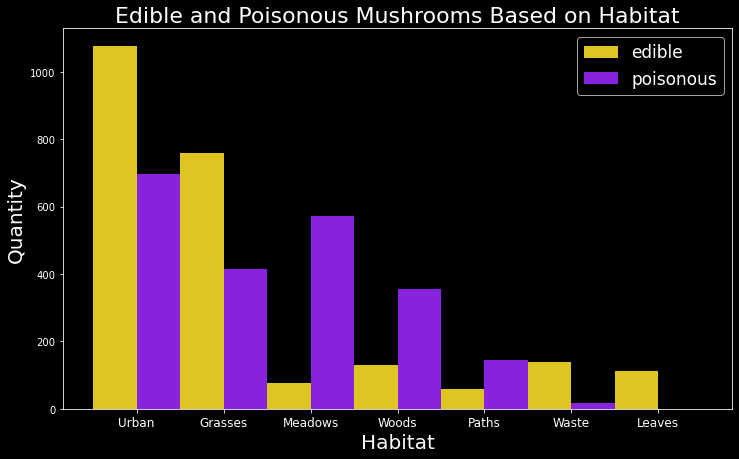

In [12]:
hab_chart(train)

Takeaways:
    - Not super destinguishable.
    - Biggest takeaway is that if you see a mushroom growing in an urban area, it's more than likely edible, but I wouldn't test it unless you are sure.

In [13]:
observed1 = pd.crosstab(train.habitat, train.mclass)

# scipy function calculates values based on the crosstab created
chi2, p, degf, expected = chi2_contingency(observed1)

print('Observed\n')
print(observed1.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

if p < alpha:
    print('\nP is less than alpha. We reject the null hypothesis.')

Observed

[[1075  697]
 [ 760  414]
 [ 129  354]
 [ 139   16]
 [  77  572]
 [  58  145]
 [ 113    0]]
---
Expected

[[915.79951638 856.20048362]
 [606.74302044 567.25697956]
 [249.62255441 233.37744559]
 [ 80.10661684  74.89338316]
 [335.41415696 313.58584304]
 [104.91382721  98.08617279]
 [ 58.40030776  54.59969224]]
---

chi^2 = 908.7373
p     = 0.0000

P is less than alpha. We reject the null hypothesis.


## Population

### Does population have a relationship with mclass?

In [14]:
pop_chart(train)

NameError: name 'pop_chart' is not defined

Takeaways: 
- Again this bar chart does show somewhat of a relationship. A very 

In [ ]:
observed2 = pd.crosstab(train.population, train.mclass)

# scipy function calculates values based on the crosstab created
chi2, p, degf, expected = chi2_contingency(observed2)

print('Observed\n')
print(observed2.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

if p < alpha:
    print('\nP is less than alpha. We reject the null hypothesis.')

## Odor


### Does odor have a relationship with mclass?

In [ ]:
odor_chart(train)

Takeaways:

- I think just from this chart, you can clearly see that odor is related to class.
- Edible have either no smell or smell like foods we like (almond, anise) while poisonous tend to have strong and sometimes offputting smells that should raise a red flag.

In [ ]:
observed3 = pd.crosstab(train.odor, train.mclass)

# scipy function calculates values based on the crosstab created
chi2, p, degf, expected = chi2_contingency(observed3)

print('Observed\n')
print(observed3.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

if p < alpha:
    print('\nP is less than alpha. We reject the null hypothesis.')

## Cap-color

### Does cap_color have a relationship with mclass?

In [ ]:
cap_chart(train)

Takeaways:

- From the chart I do see some significance between color and mclass. Edible tends to be browns/greys/neutrals while poisonous tend to be brighter, red/pink the majoirty of the time.

In [ ]:
observed4 = pd.crosstab(train.cap_color, train.mclass)

# scipy function calculates values based on the crosstab created
chi2, p, degf, expected = chi2_contingency(observed4)

print('Observed\n')
print(observed4.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

if p < alpha:
    print('\nP is less than alpha. We reject the null hypothesis.')

## Modeling

In [ ]:
#All columns that need to be dropped, not features or mclass which is the target variable.
columns_to_drop = ['mclass', 'cap_shape', 'cap_surface', 'bruises', 'gill_attachment', 'gill_spacing',
                  'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
                  'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type',
                  'veil_color', 'ring_number', 'ring_type', 'cap_color', 'odor', 'habitat', 'population', 'spore_print_color']

In [ ]:
# Create the object
X_train = train.drop(columns = columns_to_drop)
y_train = train.mclass

X_validate = validate.drop(columns = columns_to_drop)
y_validate = validate.mclass

X_test = test.drop(columns = columns_to_drop)
y_test = test.mclass

## Setting Up The Baseline

In [ ]:
train.mclass.mode() #The dataset has more Edible than Poisoneous, therefore it is our mode.

## Decision Tree

In [ ]:
df = DecisionTreeClassifier(max_depth=6, random_state=123)

df.fit(X_train, y_train)

y_pred = df.predict(X_train)
y_pred_proba = df.predict_proba(X_train)

#evaluate metrics
print('Accuracy of model with all features in train set:', df.score(X_train, y_train))
print('\nThe confusion matrix:\n',confusion_matrix(y_train, y_pred))
print('\nClassification report:\n',classification_report(y_train, y_pred))

In [ ]:
X_train.columns